In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns= ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
          'race','sex', 'capital-gain','capital-loss','hours-per-week','native-country','y']

train =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, names=columns)
test =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows = 1, 
                      header = None, names=columns)
#train=pd.read_csv('train.csv', header=None, names=columns)
#test=pd.read_csv('test.csv', skiprows=1,header=None, names=columns)

In [3]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [8]:
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                 object
dtype: object

In [9]:
test.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                 object
dtype: object

In [10]:
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
y                 0
dtype: int64

In [11]:
test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
y                 0
dtype: int64

In [12]:
train.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [13]:
test.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


# DATA PREPROCESSING

In [14]:
train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
train['occupation'].unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
train['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [17]:
train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [18]:
train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [19]:
# Drop "?" in the data 

In [20]:
train=train.drop(train.loc[(train==" ?").any(axis=1)].index)
test=test.drop(test.loc[(test==" ?").any(axis=1)].index)

In [21]:
#train=train.drop(train.columns[[ 3]], axis=1)
#test=test.drop(test.columns[[ 3]], axis=1)

# DATA EXPLORATION

In [22]:
train['workclass'].value_counts(),test['workclass'].value_counts()


( Private             22286
  Self-emp-not-inc     2499
  Local-gov            2067
  State-gov            1279
  Self-emp-inc         1074
  Federal-gov           943
  Without-pay            14
 Name: workclass, dtype: int64,  Private             11021
  Self-emp-not-inc     1297
  Local-gov            1033
  State-gov             667
  Self-emp-inc          572
  Federal-gov           463
  Without-pay             7
 Name: workclass, dtype: int64)

In [23]:
train['education'].value_counts(),test['education'].value_counts()

( HS-grad         9840
  Some-college    6678
  Bachelors       5044
  Masters         1627
  Assoc-voc       1307
  11th            1048
  Assoc-acdm      1008
  10th             820
  7th-8th          557
  Prof-school      542
  9th              455
  12th             377
  Doctorate        375
  5th-6th          288
  1st-4th          151
  Preschool         45
 Name: education, dtype: int64,  HS-grad         4943
  Some-college    3221
  Bachelors       2526
  Masters          887
  Assoc-voc        652
  11th             571
  Assoc-acdm       499
  10th             403
  7th-8th          266
  Prof-school      243
  9th              221
  12th             200
  Doctorate        169
  5th-6th          161
  1st-4th           71
  Preschool         27
 Name: education, dtype: int64)

In [24]:
# Education categories are bucketed
train['education'].replace(' 1st-4th','Basic',inplace=True)
train['education'].replace(' 5th-6th','Basic',inplace=True)
train['education'].replace(' 7th-8th','HS',inplace=True)
train['education'].replace(' 9th','HS',inplace=True)
train['education'].replace(' 10th','HS',inplace=True)
train['education'].replace(' 11th','HS',inplace=True)
train['education'].replace(' 12th','HS',inplace=True)

test['education'].replace(' 1st-4th','Basic',inplace=True)
test['education'].replace(' 5th-6th','Basic',inplace=True)
test['education'].replace(' 7th-8th','HS',inplace=True)
test['education'].replace(' 9th','HS',inplace=True)
test['education'].replace(' 10th','HS',inplace=True)
test['education'].replace(' 11th','HS',inplace=True)
test['education'].replace(' 12th','HS',inplace=True)

In [25]:
train['occupation'].value_counts(),test['occupation'].value_counts()

( Prof-specialty       4038
  Craft-repair         4030
  Exec-managerial      3992
  Adm-clerical         3721
  Sales                3584
  Other-service        3212
  Machine-op-inspct    1966
  Transport-moving     1572
  Handlers-cleaners    1350
  Farming-fishing       989
  Tech-support          912
  Protective-serv       644
  Priv-house-serv       143
  Armed-Forces            9
 Name: occupation, dtype: int64,  Exec-managerial      1992
  Craft-repair         1990
  Prof-specialty       1970
  Sales                1824
  Adm-clerical         1819
  Other-service        1596
  Machine-op-inspct    1004
  Transport-moving      744
  Handlers-cleaners     696
  Tech-support          508
  Farming-fishing       491
  Protective-serv       332
  Priv-house-serv        89
  Armed-Forces            5
 Name: occupation, dtype: int64)

In [26]:
train['native-country'].value_counts(), test['native-country'].value_counts()


( United-States                 27504
  Mexico                          610
  Philippines                     188
  Germany                         128
  Puerto-Rico                     109
  Canada                          107
  El-Salvador                     100
  India                           100
  Cuba                             92
  England                          86
  Jamaica                          80
  South                            71
  China                            68
  Italy                            68
  Dominican-Republic               67
  Vietnam                          64
  Guatemala                        63
  Japan                            59
  Poland                           56
  Columbia                         56
  Iran                             42
  Taiwan                           42
  Haiti                            42
  Portugal                         34
  Nicaragua                        33
  Peru                             30
  Greece    

In [27]:
train['relationship'].value_counts(),train['relationship'].value_counts()

( Husband           12463
  Not-in-family      7726
  Own-child          4466
  Unmarried          3212
  Wife               1406
  Other-relative      889
 Name: relationship, dtype: int64,  Husband           12463
  Not-in-family      7726
  Own-child          4466
  Unmarried          3212
  Wife               1406
  Other-relative      889
 Name: relationship, dtype: int64)

# DATA VISUALIZATION

In [28]:
train.shape,test.shape

((30162, 15), (15060, 15))

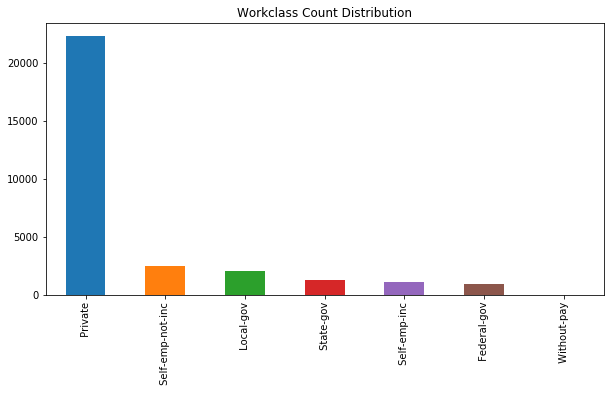

In [29]:
plt.figure(figsize=(10,5)) 
plt.title("Workclass Count Distribution")
train['workclass'].value_counts().plot.bar()

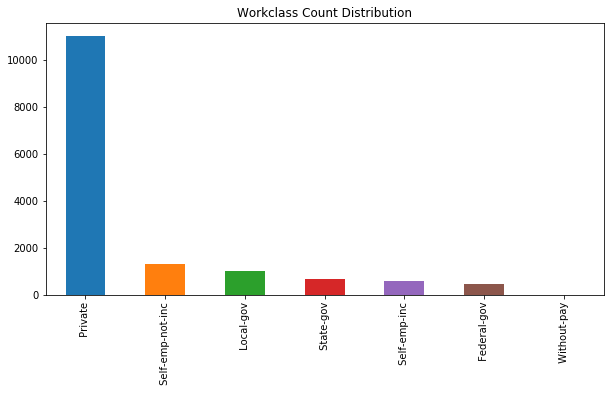

In [30]:
plt.figure(figsize=(10,5)) 
plt.title("Workclass Count Distribution")
test['workclass'].value_counts().plot.bar()

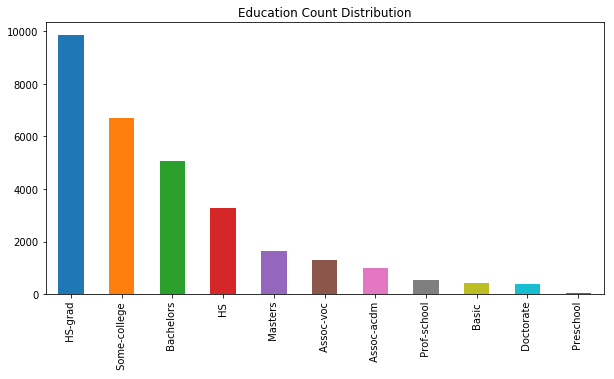

In [31]:
plt.figure(figsize=(10,5))
plt.title("Education Count Distribution")
train['education'].value_counts().plot.bar()

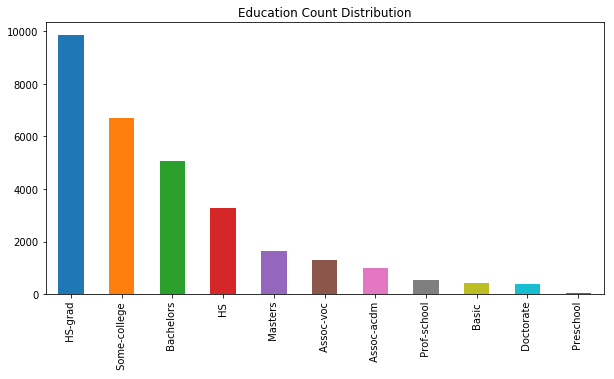

In [32]:
plt.figure(figsize=(10,5))
plt.title("Education Count Distribution")
train['education'].value_counts().plot.bar()

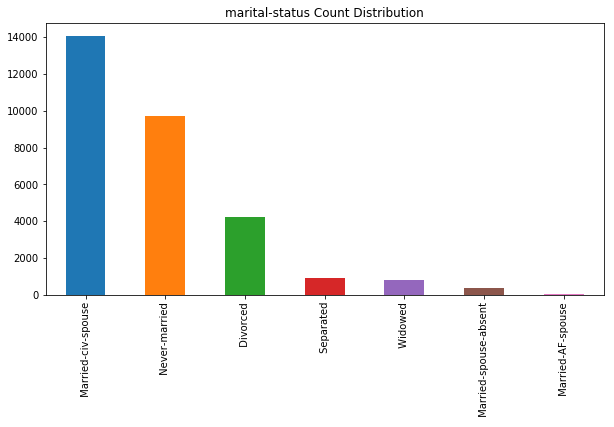

In [33]:
plt.figure(figsize=(10,5))
plt.title("marital-status Count Distribution")
train['marital-status'].value_counts().plot.bar()

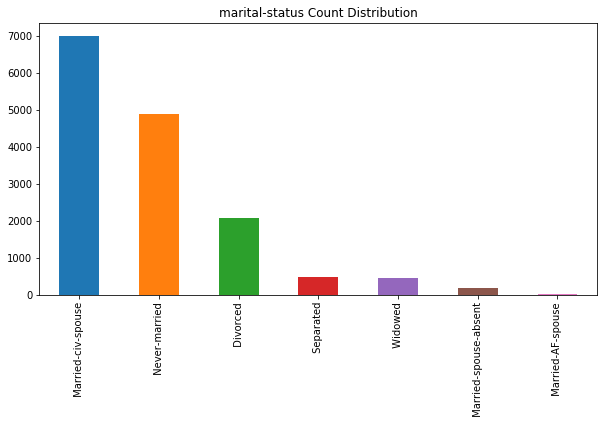

In [34]:
plt.figure(figsize=(10,5))
plt.title("marital-status Count Distribution")
test['marital-status'].value_counts().plot.bar()

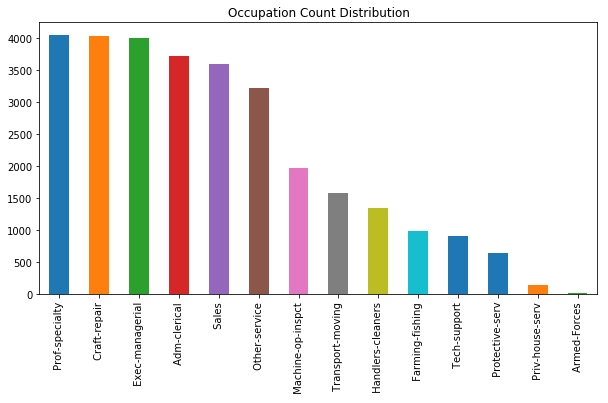

In [35]:
plt.figure(figsize=(10,5))
plt.title("Occupation Count Distribution")
train['occupation'].value_counts().plot.bar()

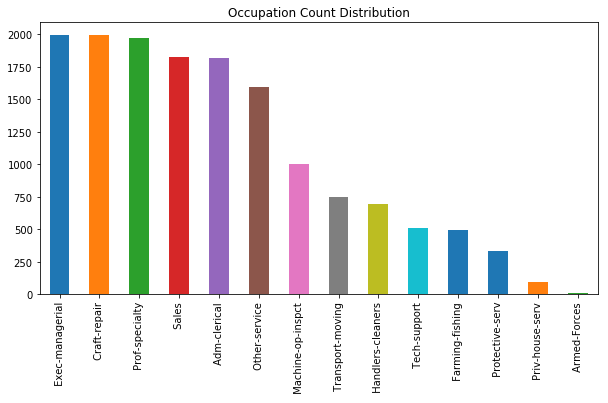

In [36]:
plt.figure(figsize=(10,5))
plt.title("Occupation Count Distribution")
test['occupation'].value_counts().plot.bar()

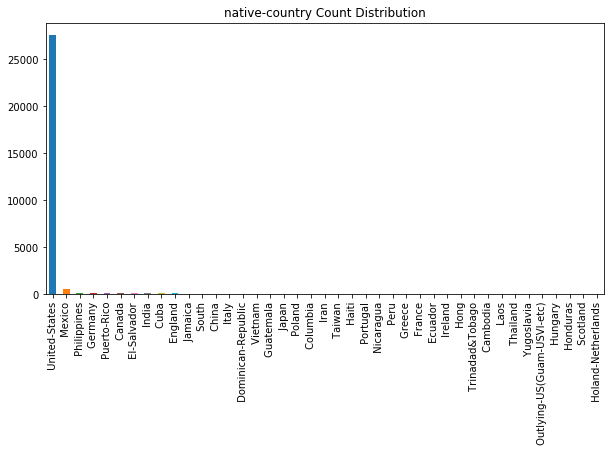

In [37]:
plt.figure(figsize=(10,5))
plt.title("native-country Count Distribution")
train['native-country'].value_counts().plot.bar()

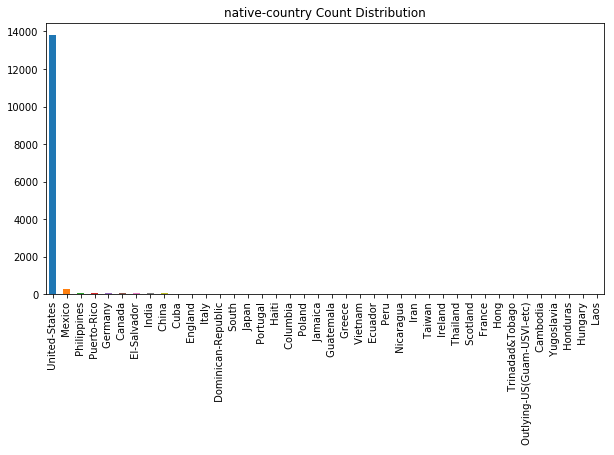

In [38]:
plt.figure(figsize=(10,5))
plt.title("native-country Count Distribution")
test['native-country'].value_counts().plot.bar()

In [39]:
###Dropping 'Holand-Netherlands' in 'native-country' as this is only contry not present in Test and it prevents the fit of Model
train=train.loc[train['native-country'].isin([' United-States', ' Cuba', ' Jamaica', ' India',  ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'])]

In [40]:
# Label Encoding Category columns

In [41]:
obj_columns=train.select_dtypes(['object']).columns
train[obj_columns]=train[obj_columns].apply(lambda x: x.astype('category'))

obj_columns=test.select_dtypes(['object']).columns
test[obj_columns]=test[obj_columns].apply(lambda x: x.astype('category'))


cat_columns = train.select_dtypes(['category']).columns
train[cat_columns] = train[cat_columns].apply(lambda x: x.cat.codes.astype('int64'))

cat_columns = test.select_dtypes(['category']).columns
test[cat_columns] = test[cat_columns].apply(lambda x: x.cat.codes.astype('int64'))

# Creating Xtrain and ytrain
Xtrain=train.iloc[:,:-1]
ytrain=train.iloc[:, 14]

In [42]:
Xtrain.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32556,27,2,257302,0,12,2,12,5,4,0,0,0,38,37
32557,40,2,154374,4,9,2,6,0,4,1,0,0,40,37
32558,58,2,151910,4,9,6,0,4,4,0,0,0,40,37
32559,22,2,201490,4,9,4,0,3,4,1,0,0,20,37
32560,52,3,287927,4,9,2,3,5,4,0,15024,0,40,37


In [43]:
ytrain.tail()

32556    0
32557    1
32558    0
32559    0
32560    1
Name: y, dtype: int64

In [44]:
#Creating features list 
features=train.columns[:-1]
features

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [45]:
#List of Category columns
cat_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'y'],
      dtype='object')

In [46]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,5,77516,2,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,83311,2,13,2,3,0,4,1,0,0,13,37,0
2,38,2,215646,4,9,0,5,1,4,1,0,0,40,37,0
3,53,2,234721,10,7,2,5,0,2,1,0,0,40,37,0
4,28,2,338409,2,13,2,9,5,2,0,0,0,40,4,0


# Splitting X and y

In [47]:
X_train=pd.DataFrame(train.iloc[:,:-1].values)
X_test=pd.DataFrame(test.iloc[:,:-1].values)
y_train=train.iloc[:, 14].values
y_test=test.iloc[:, 14].values

In [48]:
X_train.shape,y_train.shape

((30161, 14), (30161,))

In [49]:
X_test.shape,y_test.shape

((15060, 14), (15060,))

In [50]:
# One hot Encoding to Normalize the Categorical Data
from sklearn.preprocessing import OneHotEncoder
onehotencoder_1 = OneHotEncoder(categorical_features = [1,3,5,6,7,8,9,13])
X_train = onehotencoder_1.fit_transform(train).toarray()
onehotencoder_2 = OneHotEncoder(categorical_features = [1,3,5,6,7,8,9,13])
X_test = onehotencoder_2.fit_transform(test).toarray()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data w

In [51]:
X_train.shape,y_train.shape

((30161, 99), (30161,))

In [52]:
X_test.shape,y_test.shape

((15060, 99), (15060,))

In [53]:
###Scaling the data to Normalize Numerical Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
classification=["Logistic Regression","Decision Tree","Random Forest","Xgboost","KNeighbour"]

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy= pd.DataFrame(np.arange(len(classification)).reshape(1,len(classification)), columns=classification,index=['Test Accuracy'])

for classificationAlg in classification:
    print(classificationAlg)
    if classificationAlg=="Logistic Regression":
        from sklearn.linear_model import LogisticRegression
        classifier=LogisticRegression()
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
          
    if classificationAlg=="Decision Tree":
        from sklearn.tree import DecisionTreeClassifier
        classifier=DecisionTreeClassifier(criterion='entropy')
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
           
    if classificationAlg=="Random Forest":
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 5,random_state=0)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
        
    if classificationAlg=="Xgboost":
        import xgboost
        classifier = xgboost.XGBClassifier()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
         
    if classificationAlg=="KNeighbour":
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors=5)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
         
    print("\n Classification Algorithm Name is: ",classificationAlg)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print("\n Classification Report:\n ",classification_report(y_test, y_pred))
    score=accuracy_score(y_test,y_pred)

    print("Score is:",score)
    accuracy.loc[:,classificationAlg] =score
#highlight_max=dfi.max()    
print("\n",accuracy)


Logistic Regression


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 Classification Algorithm Name is:  Logistic Regression
[[11360     0]
 [    0  3700]]

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

   micro avg       1.00      1.00      1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060

Score is: 1.0
Decision Tree

 Classification Algorithm Name is:  Decision Tree
[[11360     0]
 [    0  3700]]

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

   micro avg       1.00      1.00      1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060

Score is: 1.0
Random Forest

 Classification Algorithm Name is:  Random Forest
[[11353     7]


In [58]:
print(accuracy)

               Logistic Regression  Decision Tree  Random Forest  Xgboost  \
Test Accuracy                  1.0            1.0       0.998805      1.0   

               KNeighbour  
Test Accuracy    0.948207  


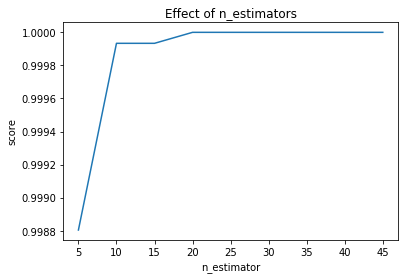

In [59]:
#Optimizing the Random Forest
estimators = np.arange(5, 50, 5)
scores = []
for n in estimators:
    classifier = RandomForestClassifier(n_estimators = n,random_state=0)
    classifier.set_params(n_estimators=n)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("\n Classification Algorithm Name is: ",classificationAlg)
cm = confusion_matrix(y_test, y_pred)
print(cm)
    
print("\n Classification Report:\n ",classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)

print("Score is:",score)
accuracy['Random Forest']=score


 Classification Algorithm Name is:  KNeighbour
[[11360     0]
 [    0  3700]]

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

   micro avg       1.00      1.00      1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060

Score is: 1.0


# Feature Importance and Recursive Feature Elimination

In [61]:
#rsive Feature EliminationPython

# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
#dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(Xtrain, ytrain)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False False False False  True  True False False False  True False False
 False False]
[ 5  4 12  7  1  1  8  2  3  1 11  9  6 10]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
# display the relative importance of each attribute
importances = list(model.feature_importances_)
feature_importances=[(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
feature_importances

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[('age', 0.16),
 ('workclass', 0.04),
 ('fnlwgt', 0.18),
 ('education', 0.04),
 ('education-num', 0.09),
 ('marital-status', 0.07),
 ('occupation', 0.07),
 ('relationship', 0.1),
 ('race', 0.01),
 ('sex', 0.01),
 ('capital-gain', 0.1),
 ('capital-loss', 0.03),
 ('hours-per-week', 0.08),
 ('native-country', 0.02)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

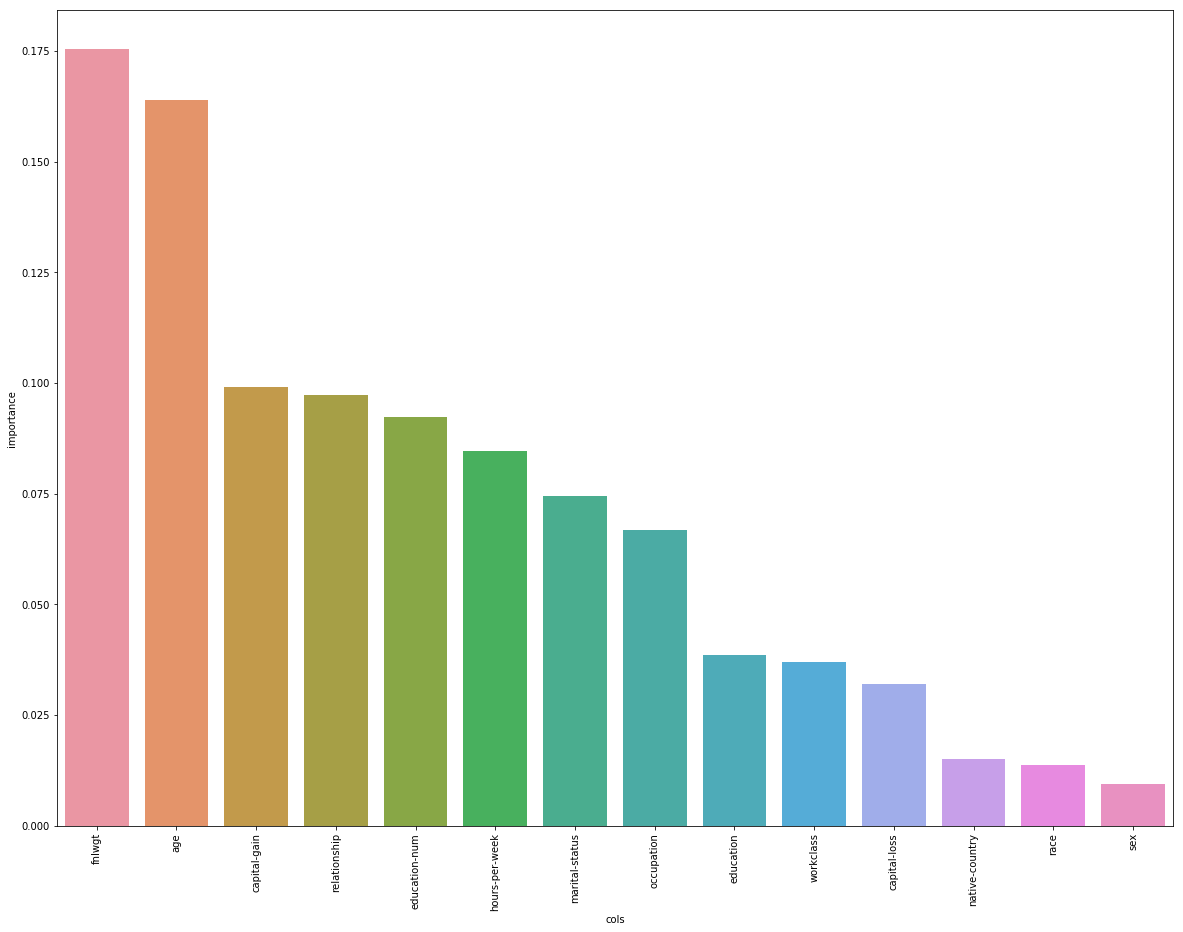

In [63]:
importance = pd.DataFrame.from_dict({'cols':features, 'importance': model.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

# Above graph shows "fnlwgt" has more imporatance over other features

In [64]:
print(accuracy)

               Logistic Regression  Decision Tree  Random Forest  Xgboost  \
Test Accuracy                  1.0            1.0            1.0      1.0   

               KNeighbour  
Test Accuracy    0.948207  


In [67]:
classifications = [
            ("Logistic Regression", LogisticRegression()),
            ("Decision Tree ",  DecisionTreeClassifier()),
            ("Random Forest",  RandomForestClassifier(n_estimators=20)),
            ("KNeighbour",  KNeighborsClassifier(5)),
            ("XGBoost", xgboost.XGBClassifier())]

crossval = pd.DataFrame(index=['Test Accuracy'])

from sklearn.model_selection import cross_val_score, cross_val_predict

scoring = 'accuracy'
results=[]
names=[]
for classifier_name,model in classifications:
    accuracy =cross_val_score(model, X_train,y_train, cv=10,scoring='accuracy').mean()
    crossval[classifier_name] =accuracy
    print(classifier_name,"\n\t Accuracy :", accuracy)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Regression 
	 Accuracy : 1.0
Decision Tree  
	 Accuracy : 1.0
Random Forest 
	 Accuracy : 0.9999336870026525
KNeighbour 
	 Accuracy : 0.950598155475495
XGBoost 
	 Accuracy : 1.0


 Above accuracy scores shows Logistic Regression, Decision Tree and XGBoost give 100% accuracy